# Official Documents Semantic Enrichment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from pandas import Series, DataFrame
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
output_folder = '/home/stephane/Playground/PycharmProjects/machine-learning/Classification/DataPrep/output'

## load helper dictionnaries

In [2]:
files_features = {}
topics = {}
with open(os.path.join(output_folder, 'files_features.pkl'), 'rb') as input_file:
    files_features = pickle.load(input_file)
with open(os.path.join(output_folder, 'topics.pkl'), 'rb') as input_file:
    topics = pickle.load(input_file)

### Files features can be used to build the feature_vector of official documents.

In [3]:
# TODO: need to sort by ascending values
# TODO: need to fill missing values
files_features = Series(files_features)
files_features.head()

00085173    (1754, 1777, 1779, 1780, 2422, 2432, 3296, 386...
00085182    (1030, 1190, 1473, 1544, 1646, 1779, 1780, 236...
00085184    (1581, 1646, 1649, 2389, 2452, 3184, 4028, 485...
00085189    (1516, 1555, 1593, 1635, 1744, 1754, 2164, 216...
00085929    (1428, 1472, 1545, 1646, 1649, 2389, 2452, 402...
dtype: object

### Topics series gives the correspondance between topic id and label

In [15]:
topics = Series(topics)
topics = topics.sort_index()
topics.head()

1               development aid
2    international co-operation
3           absorptive capacity
4              aid coordination
5                aid evaluation
dtype: object

In [6]:
max_topic = topics.index.max()
max_topic

6666

### Complete with missing topics to get "full" index

In [16]:
full_topic_index = range(1, max_topic+1)
full_topics = topics.reindex(full_topic_index, fill_value='n/a')

In [17]:
full_topics.head(20)

1                 development aid
2      international co-operation
3             absorptive capacity
4                aid coordination
5                  aid evaluation
6                   aid financing
7                aid institutions
8                  aid programmes
9            development agencies
10          development personnel
11               needs assessment
12                            n/a
13                   terms of aid
14                    foreign aid
15        industrial co-operation
16    international organisations
17          regional co-operation
18         regional organisations
19            bilateral relations
20        international relations
dtype: object

#### Easily access topics for a given file

In [18]:
print([(i,topics[i]) for i in files_features[0]])

[(1754, 'swine'), (1777, 'meat industry'), (1779, 'meat'), (1780, 'dairy products'), (2422, 'international market'), (2432, 'economic co-operation'), (3296, 'environmental effects'), (3868, 'mouth diseases'), (4028, 'agendas'), (5033, 'electronic mail'), (5373, 'policy reform'), (5505, 'environmental standards')]


## Load file feature vectors

In [19]:
df = pd.read_hdf(path_or_buf='DataPrep/output/feature_vectors.hdf', key='feature_vectors')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
JT00142962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19992965ENG,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
JT00193235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03362486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00170454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03350772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19911510ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19972286ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00105337,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03338508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273333 entries, JT00142962 to JT00131845
Columns: 6667 entries, 0 to 6666
dtypes: int8(6667)
memory usage: 1.7+ GB


### Identify columns with only zeros (i.e. unused topics)

In [21]:
v = df.sum(axis=0)
v = v[v == 0]
v.index

Int64Index([   0,   12,   22,   34,   41,   83,   91,  102,  103,  104,
            ...
            6314, 6349, 6376, 6396, 6413, 6447, 6463, 6481, 6537, 6563],
           dtype='int64', length=1094)

### Remove columns with only zeros

In [22]:
df.drop(axis=1, labels=v.index[:], inplace=True)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
JT00142962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19992965ENG,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
JT00193235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03362486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00170454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03350772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19911510ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19972286ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00105337,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03338508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Use labels rather than ids

In [23]:
df.rename(columns=topics, inplace=True)
df.head(10)

,development aid,international co-operation,absorptive capacity,aid coordination,aid evaluation,aid financing,aid institutions,aid programmes,development agencies,development personnel,...,judgements,dispositions,parties,long-term growth,data localisation,regulatory co-operation,open government data,trade costs,social media,medical radioisotopes
JT00142962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19992965ENG,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
JT00193235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03362486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00170454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03350772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19911510ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19972286ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00105337,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03338508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Easily access files features

In [24]:
df.iloc[9][df.iloc[9] > 0]

trade                       1
seeds                       1
economic co-operation       1
agriculture                 1
adoption                    1
rules and regulations       1
development co-operation    1
authority                   1
Name: JT03338508, dtype: int8

## Load time based topics usage

In [38]:
dated_df = pd.read_hdf(path_or_buf='DataPrep/output/dated_feature_vectors.hdf', key='topics_usage')
dated_df = dated_df.sort_index()
dated_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-02,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1990-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-04,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1990-01-08,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1990-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-11,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
dated_df.axes[0].max()

datetime.date(2015, 10, 5)

#### Fill with any missing day

In [48]:
date_index = pd.date_range(start='1989-12-21', end='2015-10-05', freq='D')
dated_df = dated_df.reindex(date_index, fill_value=0)
dated_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Identify columns with only zeros

In [49]:
v = dated_df.sum(axis=0)
v = v[v == 0]
v.index

Int64Index([   0,   12,   22,   34,   41,   83,   91,  102,  103,  104,
            ...
            6314, 6349, 6376, 6396, 6413, 6447, 6463, 6481, 6537, 6563],
           dtype='int64', length=1094)

#### Remove columns with only zeros

In [50]:
dated_df.drop(axis=1, labels=v.index[:], inplace=True)
dated_df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Use labels rather than ids

In [51]:
dated_df.rename(columns=topics, inplace=True)
dated_df.head(10)

,development aid,international co-operation,absorptive capacity,aid coordination,aid evaluation,aid financing,aid institutions,aid programmes,development agencies,development personnel,...,judgements,dispositions,parties,long-term growth,data localisation,regulatory co-operation,open government data,trade costs,social media,medical radioisotopes
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Easily access file features

In [52]:
dated_df.iloc[8][dated_df.iloc[8] > 0]

sales                       1
economic development        1
lists of documents          1
experts                     1
conferences                 1
development co-operation    1
Name: 1989-12-29 00:00:00, dtype: int64

### Identify most used topics

In [53]:
histo = dated_df.apply(np.cumsum).iloc[-1]
histo.sort_values(inplace=True, ascending=False)
histo.head(10)

development co-operation    77773
economic co-operation       71426
conferences                 43684
work programmes             41265
agendas                     40752
economic development        33021
development aid             32676
labour                      32398
electronic mail             21352
budget                      19174
Name: 2015-10-05 00:00:00, dtype: int64

In [54]:
histo.head(10).index

Index(['development co-operation', 'economic co-operation', 'conferences',
       'work programmes', 'agendas', 'economic development', 'development aid',
       'labour', 'electronic mail', 'budget'],
      dtype='object')

### See time evolution of topics frequency

In [55]:
dev_aid = dated_df.loc[:,histo.head(10).index[:]]
dev_aid.head(10)

,development co-operation,economic co-operation,conferences,work programmes,agendas,economic development,development aid,labour,electronic mail,budget
1989-12-21,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0
1989-12-26,0,0,0,0,0,0,0,0,0,0
1989-12-27,0,0,0,0,0,0,0,0,0,0
1989-12-28,0,0,0,0,0,0,0,0,0,0
1989-12-29,1,0,1,0,0,1,0,0,0,0
1989-12-30,0,0,0,0,0,0,0,0,0,0


In [56]:
dev_aid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9420 entries, 1989-12-21 to 2015-10-05
Freq: D
Data columns (total 10 columns):
development co-operation    9420 non-null int64
economic co-operation       9420 non-null int64
conferences                 9420 non-null int64
work programmes             9420 non-null int64
agendas                     9420 non-null int64
economic development        9420 non-null int64
development aid             9420 non-null int64
labour                      9420 non-null int64
electronic mail             9420 non-null int64
budget                      9420 non-null int64
dtypes: int64(10)
memory usage: 809.5 KB


### Plot

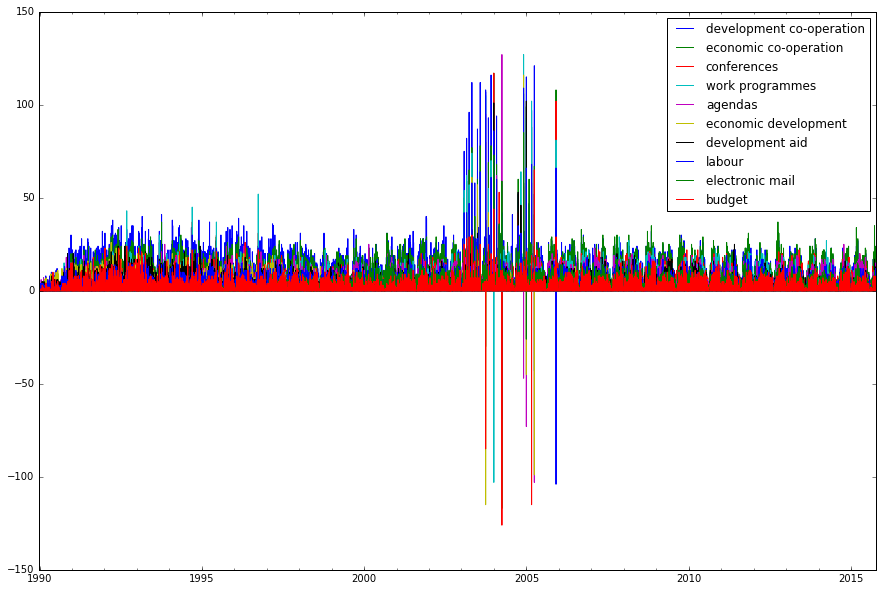

In [57]:
dev_aid.plot()
plt.show()

### Monthly frequency should be better

In [58]:
dev_aid = dev_aid.resample('M').sum()

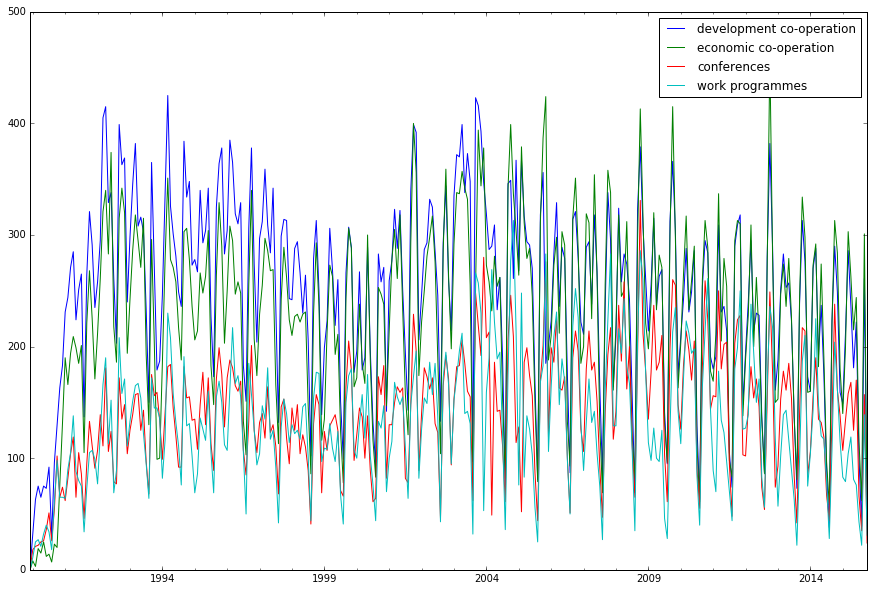

In [59]:
dev_aid.iloc[:,0:4].plot()
plt.show()

### Statistical info about topics occurrence frequencies

In [60]:
pd.DataFrame([dev_aid.min(), dev_aid.max(), dev_aid.mean()], ['min', 'max', 'mean']).T

,min,max,mean
development co-operation,1.0,425.0,250.073955
economic co-operation,0.0,459.0,229.665595
conferences,1.0,331.0,140.463023
work programmes,0.0,313.0,132.684887
agendas,0.0,296.0,131.035370
economic development,-14.0,261.0,106.176849
development aid,0.0,242.0,105.067524
labour,0.0,253.0,104.173633
electronic mail,0.0,193.0,68.655949
budget,-43.0,153.0,61.652733


In [61]:
dev_aid.describe().T

,count,mean,std,min,25%,50%,75%,max
development co-operation,311.0,250.073955,86.344682,1.0,196.5,264.0,309.0,425.0
economic co-operation,311.0,229.665595,88.498355,0.0,181.0,244.0,292.5,459.0
conferences,311.0,140.463023,55.450801,1.0,103.5,143.0,179.0,331.0
work programmes,311.0,132.684887,59.644136,0.0,95.0,130.0,171.0,313.0
agendas,311.0,131.035370,49.630851,0.0,96.0,138.0,166.0,296.0
economic development,311.0,106.176849,43.449759,-14.0,75.5,100.0,132.0,261.0
development aid,311.0,105.067524,39.066427,0.0,79.0,104.0,130.0,242.0
labour,311.0,104.173633,44.393135,0.0,74.5,103.0,131.0,253.0
electronic mail,311.0,68.655949,50.135114,0.0,16.0,74.0,110.5,193.0
budget,311.0,61.652733,30.037852,-43.0,43.0,60.0,79.0,153.0


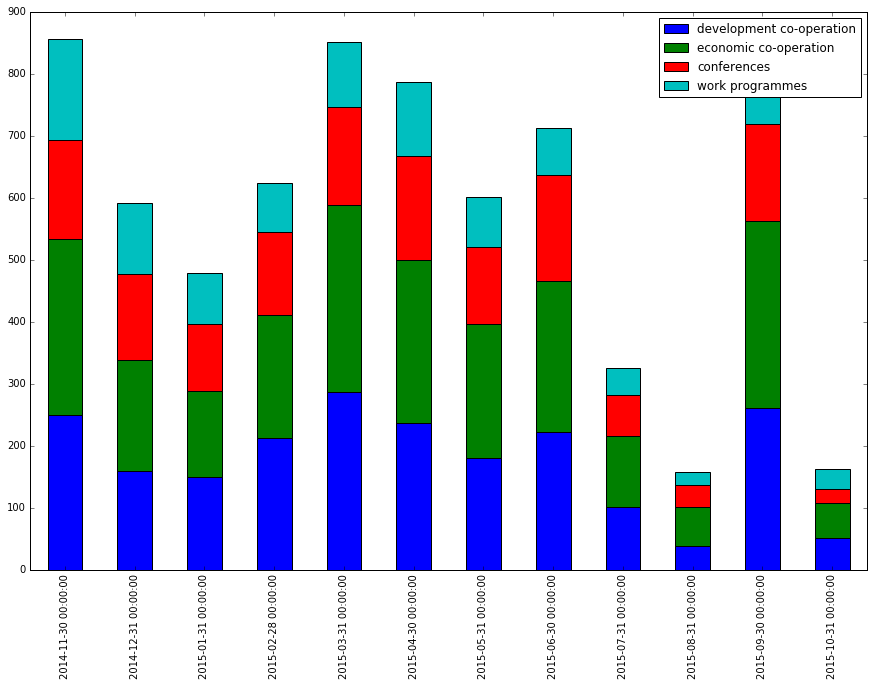

In [62]:
dev_aid.iloc[-12:,0:4].plot(kind='bar', stacked=True)
plt.show()

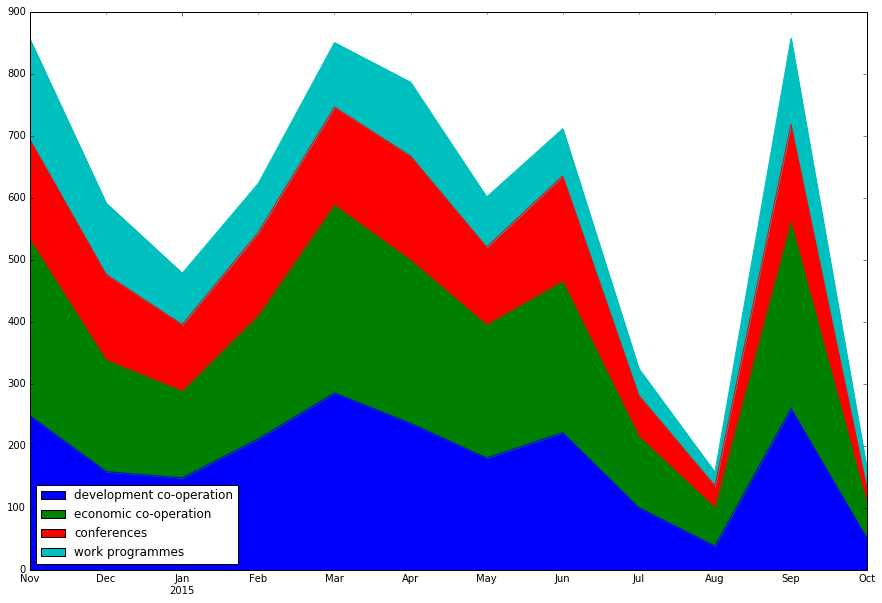

In [63]:
dev_aid.iloc[-12:,0:4].plot(kind='area')
plt.show()

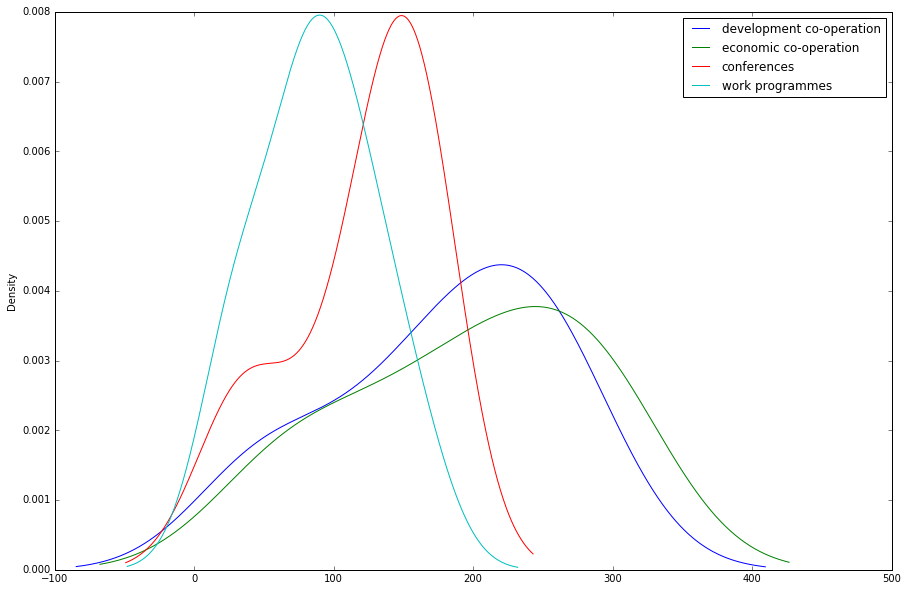

In [64]:
dev_aid.iloc[-12:,0:4].plot(kind='kde')
plt.show()

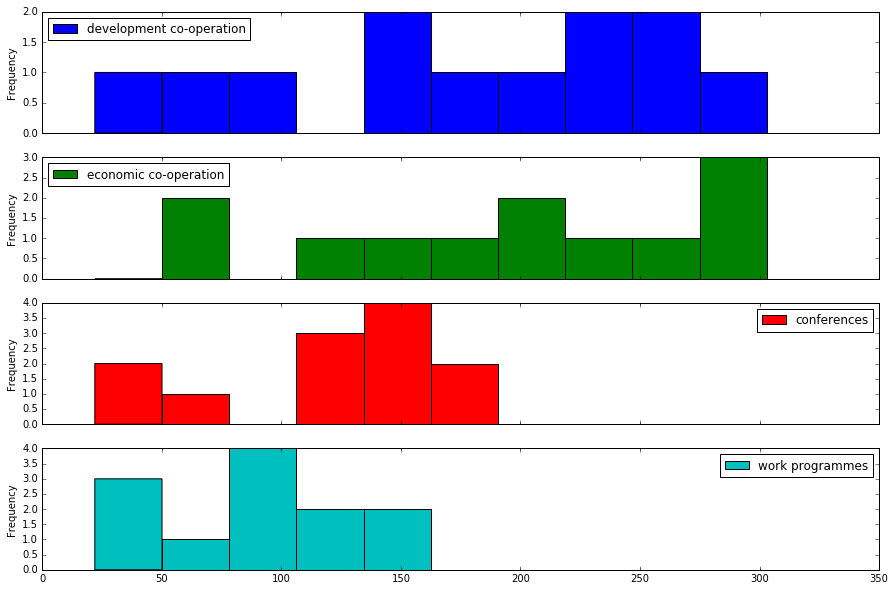

In [65]:
dev_aid.iloc[-12:,0:4].plot(kind='hist', subplots=True)
plt.show()

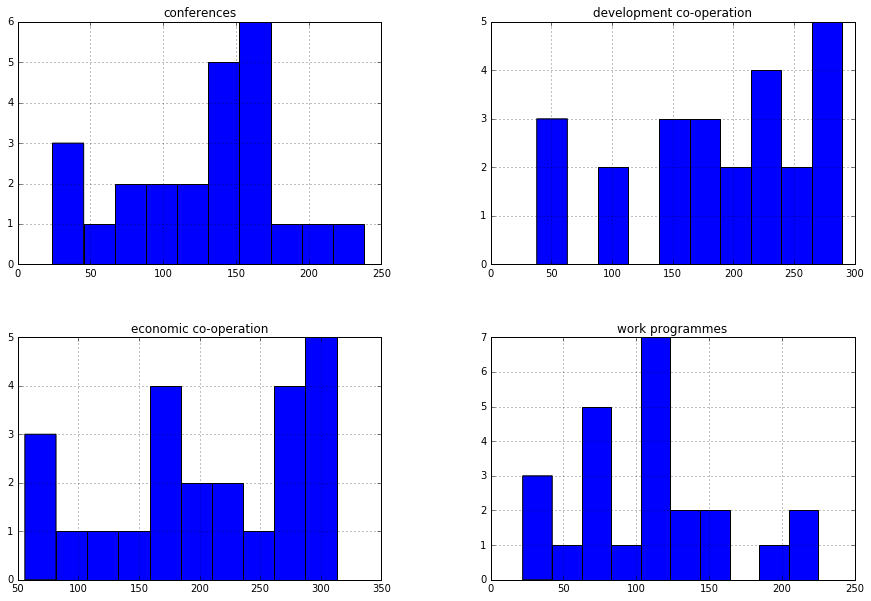

In [66]:
dev_aid.iloc[-24:,0:4].hist()
plt.show()

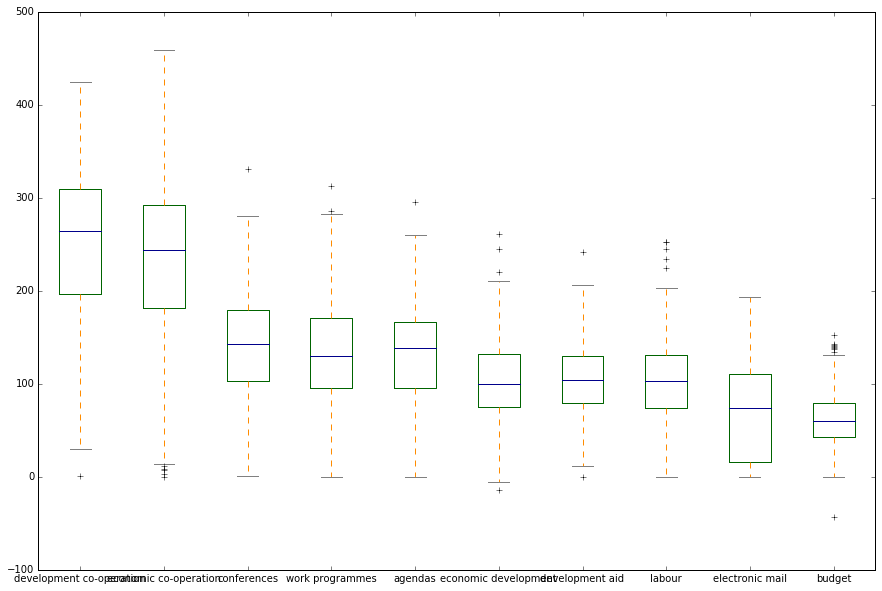

In [67]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
dev_aid.plot.box(color=color)
plt.show()

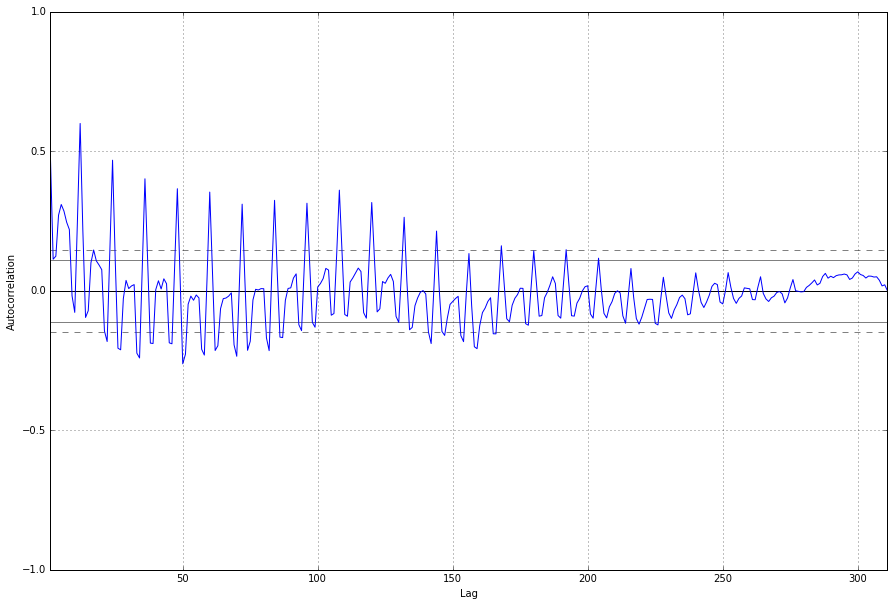

In [72]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(dev_aid.iloc[:,0])
plt.show()

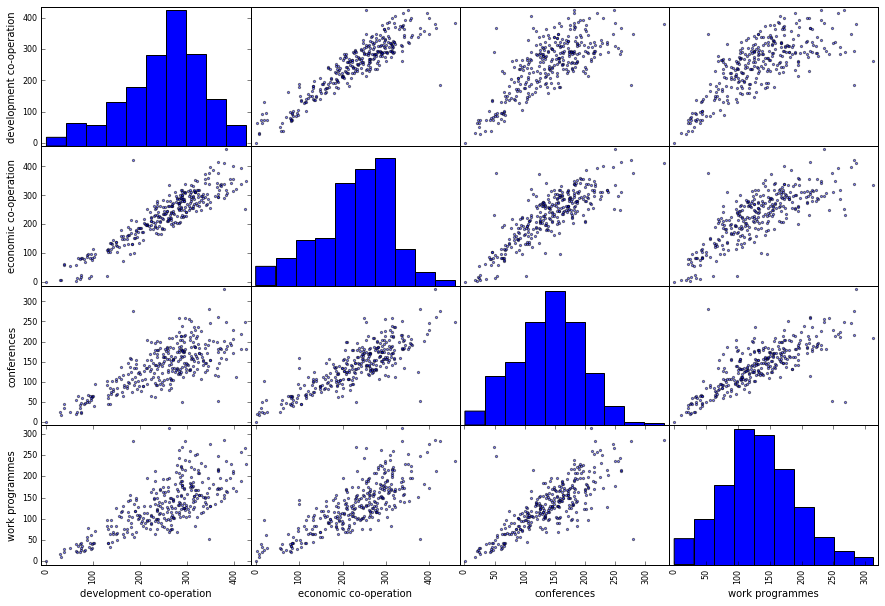

In [69]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dev_aid.iloc[:,0:4])
plt.show()

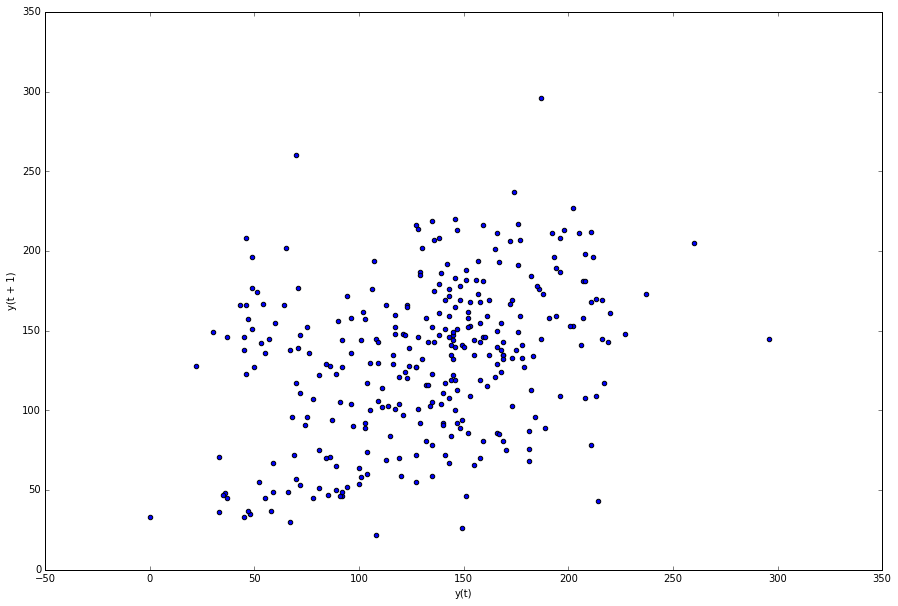

In [70]:
from pandas.tools.plotting import lag_plot
lag_plot(dev_aid.iloc[:,4])
plt.show()